python version :  3.9.12


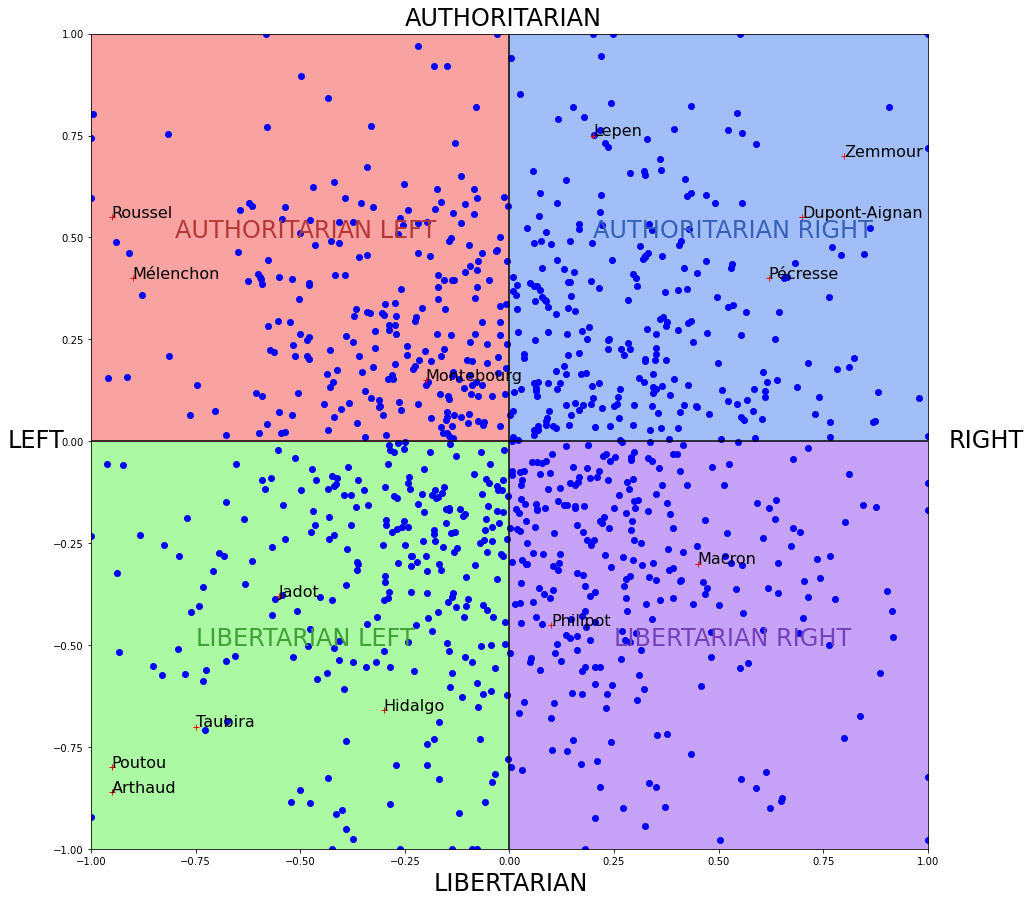

In [12]:
%run recherche.ipynb

In [18]:
# On ne récréer pas la liste de coordonnées à chaque fois, pour loi uniforme
listNbVoters = [10,50,100,500,1000,10000]

# PLOT YOUR CANDIDATES

dic = {"Macron":[0.45, -0.3],"Montebourg": [-0.20,0.15],"Mélenchon":[-0.90,0.40],"Zemmour":[0.8, 0.7],
       "Dupont-Aignan":[0.7, 0.55],"Pécresse":[0.62, 0.40],"Lepen":[0.2, 0.75],
       "Philipot":[0.1, -0.45],"Roussel":[-0.95,0.55],"Jadot":[-0.55,-0.38],
       "Hidalgo":[-0.3,-0.66],"Taubira":[-0.75,-0.7],
       "Poutou":[-0.95,-0.8],"Arthaud":[-0.95,-0.86]}


shuffle = list(dic.items())
np.random.shuffle(shuffle)
dic = dict(shuffle)
print(dic)

def choose_distribution(loi):
    generatedCoord = {}
    if loi == "beta":
        for nombre_votants in listNbVoters:
            coordPartiel = generate_n_beta_coord(nombre_votants)
            generatedCoord[nombre_votants] = coordPartiel
    elif loi == "normal":
        for nombre_votants in listNbVoters:
            coordPartiel = generate_n_normal_coord(nombre_votants)
            generatedCoord[nombre_votants] = coordPartiel
    else:
        coordPartiel = generate_n_uniform_coord(max(listNbVoters)) # on génére le max, puis on va ajouter au fûr et a messure, pour que les points du début reste à la même place....
        last_nb_votants = 0
        for nombre_votants in listNbVoters:
            generatedCoord[nombre_votants] = coordPartiel[0:nombre_votants][:]
            last_nb_votants = nombre_votants
    return generatedCoord


listeNomMethodes = ["Condorcet","Uninominal 1 tour","Uninominal 2 tours","Approbation","Borda",
                    "Éliminations successives","Jugement Majoritaire","Vote à la moyenne","Vote de Copeland"]

listMethods = [methodeDeCondorcet,uninominal,uninominal,approbation,methodeDeBorda,eliminationsSuccessives,
               jugementMajoritaire,vote_a_la_moyenne,vote_de_Copeland]

listNbCandidates = [2,4,6,8,10,12,14]


{'Mélenchon': [-0.9, 0.4], 'Pécresse': [0.62, 0.4], 'Jadot': [-0.55, -0.38], 'Hidalgo': [-0.3, -0.66], 'Dupont-Aignan': [0.7, 0.55], 'Montebourg': [-0.2, 0.15], 'Zemmour': [0.8, 0.7], 'Arthaud': [-0.95, -0.86], 'Poutou': [-0.95, -0.8], 'Macron': [0.45, -0.3], 'Lepen': [0.2, 0.75], 'Taubira': [-0.75, -0.7], 'Philipot': [0.1, -0.45], 'Roussel': [-0.95, 0.55]}


In [14]:
# ======== Boucle calculs vainqueurs ========

    
def simulation(distribution):
    
    dicGeneratedCoord = choose_distribution(distribution)
    
    data = []
    cpt = 0
    
    for method in listMethods:
        listeData = []
        for nb_candidat in listNbCandidates:
            dicoCandidat = {k: dic[k] for k in list(dic)[:nb_candidat]}   

            for nombre_votants in listNbVoters:

                listeCoord = dicGeneratedCoord[nombre_votants] 

                # Calculer le résultat de chaque méthode
                if cpt == 2:
                    res = method(dicoCandidat,listeCoord,2) # pour uninominal 2 tours
                else:
                    res = method(dicoCandidat,listeCoord) 

                listeData.append(res)

        cpt += 1 
        data.append(listeData)
    return data

In [15]:
import pandas as pd

data_uniform = simulation("uniform")

# ======== Résultats avec distribution Uniforme ========

df_uniform = pd.DataFrame(data_uniform,index = pd.Index(listeNomMethodes, name = 'Methods'),
                  columns = pd.MultiIndex.from_product([listNbCandidates,listNbVoters],
                                                     names=['nCandidates:', 'nVoters:']))


df_uniform.to_excel("output_results/uniform/uniform_results.xlsx")  
df_uniform.to_csv("output_results/uniform/uniform_results.csv",index=False) 

df_uniform.style

In [16]:
data_normal = simulation("normal")

# ======== Résultats avec distribution Normale ========

df_normal = pd.DataFrame(data_normal,index = pd.Index(listeNomMethodes, name = 'Methods'),
                  columns = pd.MultiIndex.from_product([listNbCandidates,listNbVoters],
                                                     names=['nCandidates:', 'nVoters:']))

df_normal.to_excel("output_results/normal/normal_results.xlsx")  
df_normal.to_csv("output_results/normal/normal_results.csv",index=False) 

df_normal.style

In [17]:
data_beta = simulation("beta")


# ======== Résultats avec distribution Bêta ========

df_beta = pd.DataFrame(data_beta,index = pd.Index(listeNomMethodes, name = 'Methods'),
                  columns = pd.MultiIndex.from_product([listNbCandidates,listNbVoters],
                                                     names=['nCandidates:', 'nVoters:']))

 
    
df_beta.to_excel("output_results/beta/beta_results.xlsx")  
df_beta.to_csv("output_results/beta/beta_results.csv",index=False)

df_beta.style